# Исследование объявлений о продаже квартир

## Этап 1. Получение данных

Импорт библиотек.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

Откроем файл `real_estate_data.csv`, учитывая разделитель, сохраним его в переменной `df` и посмотрим первые 5 строк таблицы.

In [2]:
df = pd.read_csv('real_estate_data.csv', sep='\t')

df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Посмотрим общую информацию о данных таблицы `df`.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Всего в таблице 22 столбца.

Разберём, какие в `df` столбцы и какую информацию они содержат:
- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — общая площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

Построим общую гистограмму для всех числовых столбцов таблицы.

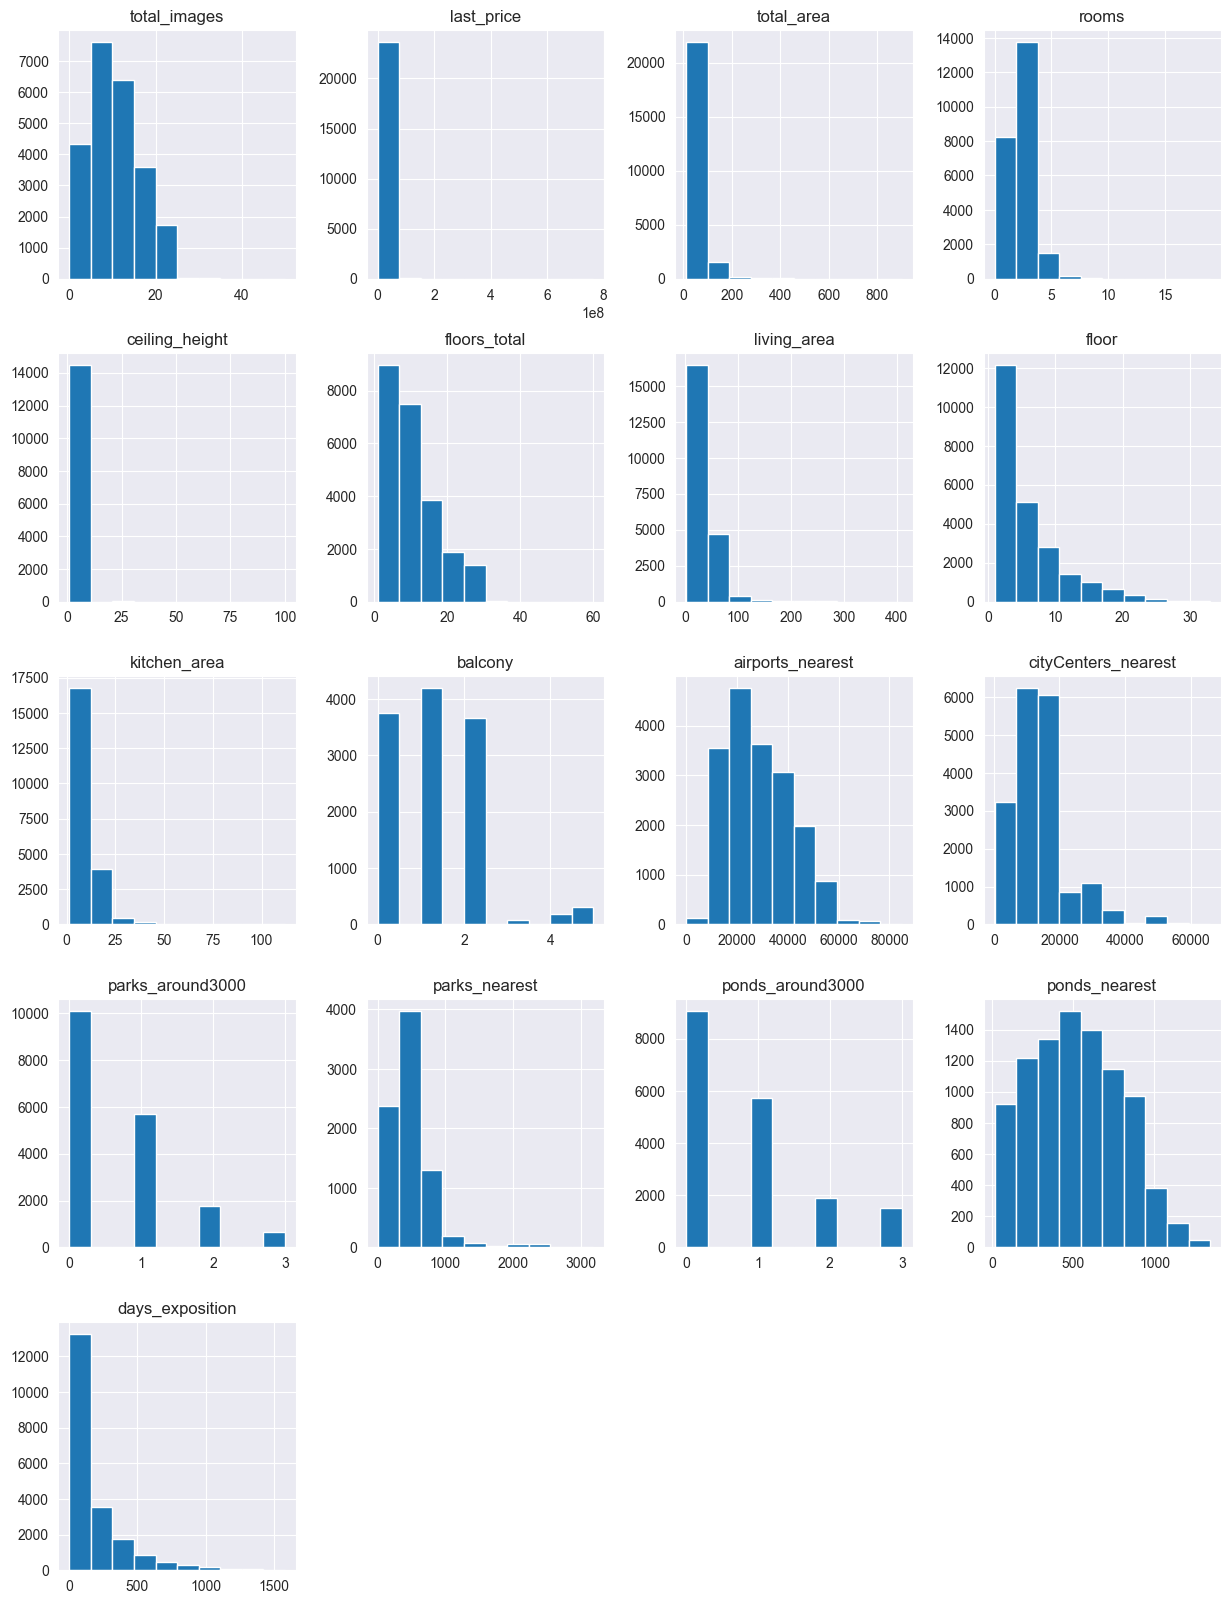

In [4]:
df.hist(figsize=(15, 20))
plt.show()

Посмотрим общую информацию о датафрейме.

In [5]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
total_images,23699.0,NaN,NaN,NaN,9.858475,5.682529,0.0,6.0,9.0,14.0,50.0
last_price,23699.0,NaN,NaN,NaN,6541548.771552,10887013.267545,12190.0,3400000.0,4650000.0,6800000.0,763000000.0
total_area,23699.0,NaN,NaN,NaN,60.348651,35.654083,12.0,40.0,52.0,69.9,900.0
first_day_exposition,23699,1491,2018-02-01T00:00:00,368,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rooms,23699.0,NaN,NaN,NaN,2.070636,1.078405,0.0,1.0,2.0,3.0,19.0
ceiling_height,14504.0,NaN,NaN,NaN,2.771499,1.261056,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,NaN,NaN,NaN,10.673824,6.597173,1.0,5.0,9.0,16.0,60.0
living_area,21796.0,NaN,NaN,NaN,34.457852,22.030445,2.0,18.6,30.0,42.3,409.7
floor,23699.0,NaN,NaN,NaN,5.892358,4.885249,1.0,2.0,4.0,8.0,33.0
is_apartment,2775,2,False,2725,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Вывод

Первое представление о данных получено. Можно сделать следующие выводы:

- В таблице 22 столбца и 23699 строк.
- Количество значений в столбцах различается. Это говорит о том, что в данных есть пропущенные значения.
- Необходимо изменить тип данных некоторых столбцов. В большинстве столбцов тип данных - `float64`, некоторые из них необходимо будет перевести в `int64`, есть столбец с датой `first_day_exposition` типом которого указан `object`, а не `datetime64`.
- Из общей информации о датафрейме видны аномальные значения в некоторых столбцах, например, минимальное количество комнат - 0, высота потолков - 100 метров. Необходимо будет обработать подобные данные.

## Этап 2. Предобработка данных

### Обработка пропусков

Посмотрим, сколько пропусков в каждом столбце.

In [6]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Много пропусков в столбце `ceiling_height`, заменим пропущенные значения на медианные и обработаем аномальные значения. 

Выведем перечень уникальных значений столбца `ceiling_height`. 

In [7]:
df['ceiling_height'].sort_values().unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

Не думаю, что высота потолков может быть выше 10 метров, разделим значения в таких строках на 10.

In [8]:
df.loc[df['ceiling_height'] > 10, 'ceiling_height'] = df.loc[df['ceiling_height'] > 10, 'ceiling_height'] / 10

Заменим пропуски в столбце медианным значением.

In [9]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

Считаю также, что маловероятными являются объекты с высотой потолков ниже 2 метров. Заменим такие значения на медианные.

In [10]:
df.loc[df['ceiling_height'] <= 2, 'ceiling_height'] = df['ceiling_height'].median()

Проверим, остались ли пропуски в столбце `ceiling_height`.

In [11]:
df['ceiling_height'].isna().sum()

0

Посмотрим, как изменилась основная информация по столбцу.

In [12]:
df['ceiling_height'].describe()

count    23699.000000
mean         2.698417
std          0.236192
min          2.200000
25%          2.600000
50%          2.650000
75%          2.700000
max         10.000000
Name: ceiling_height, dtype: float64

В столбце `floors_total` пропущено всего 86 значений из 23699. Значения данного столбца мы не можем заменить на медианные - это будет некорректно. Удалим эти пропуски. 

В столбце `locality_name` пропущено всего 49 значений. Невозможно заполнить пропуски в данном случае, поэтому также удалим их.

In [13]:
df = df.dropna(subset=['floors_total', 'locality_name']).reset_index(drop=True)
print(df['floors_total'].isna().sum())
print(df['locality_name'].isna().sum())

0
0


Заполнить столбец `living_area` медианным значением будет некорректно, поэтому чтобы данные выглядели более корректно, разделим квартиры на категории: маленькие (до 50 м²), средние (до 100 м²), большие (до 200 м²), очень большие (более 200 м²).

Для этого создадим функцию, которая разделит данные по общей площади квартиры. Добавим в датафрейме новый столбец с полученными значениями. 

In [14]:
def area_category(area):
    if area <= 50:
        return '1'
    if 50 < area <= 100:
        return '2'
    if 100 < area <= 200:
        return '3'
    if area > 200:
        return '4'

In [15]:
df['area_category'] = df['total_area'].apply(area_category)
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,area_category
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,3
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,NaN,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,1
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,NaN,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,2
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,NaN,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,3
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,2


Заполним пропуски в столбце `living_area` на медианные значения по категории. Проверим, остались ли пропуски.

In [16]:
df['living_area'] = df['living_area'].fillna(df.groupby('area_category')['living_area'].transform('median'))
df['living_area'].isna().sum()

0

Значения столбца `kitchen_area` также заменим на медианные значения по категориям квартиры.

In [17]:
df['kitchen_area'] = df['kitchen_area'].fillna(df.groupby('area_category')['kitchen_area'].transform('median'))
df['kitchen_area'].isna().sum()

0

Посмотрим уникальные значения в столбце `is_apartment`.

In [18]:
df['is_apartment'].unique()

array([nan, False, True], dtype=object)

Предполагаю, что объекты с пропущенными значениями в столбце `is_apartment` не являются апартаментами. Заменим пропущенные значения на `False` и изменим тип данных на `bool`.

In [19]:
df['is_apartment'] = df['is_apartment'].fillna(False)
df['is_apartment'] = df['is_apartment'].astype('bool')
df['is_apartment'].isna().sum()

0

Посмотрим уникальные значения в столбце `balcony`.

In [20]:
df['balcony'].value_counts(ascending=False)

1.0    4187
0.0    3680
2.0    3656
5.0     304
4.0     182
3.0      81
Name: balcony, dtype: int64

Предполагаю, если не заполнены данные в столбце `balcony`, значит - балкона нет. Пропуски в столбце `balcony` заменю на `0`.

In [21]:
df['balcony'] = df['balcony'].fillna(0)
df['balcony'].isna().sum()

0

Пропущенные значения в столбцах `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest` заменю на медианные значения, рассчитанные по населенному пункту.

In [22]:
df[
    ['airports_nearest',
    'cityCenters_nearest',
    'parks_around3000',
    'parks_nearest',
    'ponds_around3000',
    'ponds_nearest']
] = df[
    ['airports_nearest',
    'cityCenters_nearest',
    'parks_around3000',
    'parks_nearest',
    'ponds_around3000',
    'ponds_nearest']
].fillna(df.groupby(['locality_name'])[
    ['airports_nearest',
    'cityCenters_nearest',
    'parks_around3000',
    'parks_nearest',
    'ponds_around3000',
    'ponds_nearest']
].transform('median'))
df.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest        5432
cityCenters_nearest     5432
parks_around3000        5432
parks_nearest           5986
ponds_around3000        5432
ponds_nearest           5517
days_exposition         3171
area_category              0
dtype: int64

Не удалось заполнить все значения, видимо в датафрейме не хватает данных для этого. Пропущенных значений довольно много, но их удаление может привести к искажению результатов, поэтому оставим эти данные в таком виде.

Пропущенные значения в столбце `days_exposition` могут указывать на то, что на момент выгрузки данных объявления не были сняты с публикации. Оставим пропуски в датафрейме.

### Обработка аномальных значений

Рассмотрим данные в столбце `rooms`.

In [23]:
df['rooms'].value_counts()

1     8004
2     7897
3     5779
4     1172
5      325
0      194
6      104
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64

В датафрейме присутствует 194 объекта, в которых указано 0 комнат. Посмотрим распределение этих объектов.

In [24]:
df.loc[df['rooms'] == 0, 'total_area'].describe()

count    194.000000
mean      29.321701
std       26.051030
min       15.500000
25%       24.062500
50%       26.075000
75%       28.375000
max      371.000000
Name: total_area, dtype: float64

Среди объектов, где количеством комнат указан `0`, преимущественно указаны значения общей площадью от 24 до 28 м², что является средней площадью для квартир-студий. Не будем заменять или удалять данные значения, сделаем предположение, что это квартиры-студии или квартиры с открытой планировкой. Значение `0` указано там намеренно.

Переведем цены объектов в тыс.руб. для более удобного анализа и посмотрим общую информацию по столбцу.

In [25]:
df['last_price'] = df['last_price'] / 1000

In [26]:
df['last_price'].describe()

count     23565.000000
mean       6540.058260
std       10910.934722
min          12.190000
25%        3400.000000
50%        4646.000000
75%        6790.000000
max      763000.000000
Name: last_price, dtype: float64

763000 тыс.руб. за квартиру - довольно странная цена, кажется сильно завышенной. Выведем строки с ценой объекта выше 400000 тыс.руб.

In [27]:
df.loc[df['last_price'] > 400000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,area_category
12897,19,763000.0,400.0,2017-09-30T00:00:00,7,2.65,10.0,250.0,10,False,...,2.0,Санкт-Петербург,25108.0,3956.0,1.0,530.0,3.0,756.0,33.0,4
14621,15,401300.0,401.0,2016-02-20T00:00:00,5,2.65,9.0,204.0,9,False,...,3.0,Санкт-Петербург,21912.0,2389.0,1.0,545.0,1.0,478.0,393.0,4
19431,8,420000.0,900.0,2017-12-06T00:00:00,12,2.80,25.0,409.7,25,False,...,0.0,Санкт-Петербург,30706.0,7877.0,0.0,460.0,2.0,318.0,106.0,4


Цена кажется слишком завышенной. Удалим эти строки.

In [28]:
df = df[df['last_price'] <= 400000]

Рассмотрим данные в столбце `floors_total`.

In [29]:
df['floors_total'].value_counts()

5.0     5775
9.0     3757
16.0    1375
12.0    1361
4.0     1193
10.0    1173
25.0    1074
6.0      910
17.0     833
3.0      667
7.0      589
14.0     553
18.0     505
24.0     462
8.0      388
2.0      381
15.0     365
23.0     349
19.0     339
22.0     286
20.0     271
13.0     229
11.0     202
27.0     164
21.0     158
26.0     124
1.0       25
35.0      24
28.0      21
36.0       3
37.0       1
34.0       1
33.0       1
60.0       1
29.0       1
52.0       1
Name: floors_total, dtype: int64

60 этажей - довольно странный показатель, учитывая, что в самом высоком здании в Санкт-Петербурге 37 этажей. Удалим строки выше 37.

In [30]:
df = df[df['floors_total'] <= 37]

### Изменение типов данных

Переведем значения столбцов `last_price`, `floors_total`, `balcony` в целочисленный тип. Столбец `first_day_exposition` переведем в тип `datetime`.

In [31]:
df[['last_price', 'floors_total', 'balcony']] = df[['last_price', 'floors_total', 'balcony']].astype('int')
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23560 entries, 0 to 23564
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23560 non-null  int64         
 1   last_price            23560 non-null  int64         
 2   total_area            23560 non-null  float64       
 3   first_day_exposition  23560 non-null  datetime64[ns]
 4   rooms                 23560 non-null  int64         
 5   ceiling_height        23560 non-null  float64       
 6   floors_total          23560 non-null  int64         
 7   living_area           23560 non-null  float64       
 8   floor                 23560 non-null  int64         
 9   is_apartment          23560 non-null  bool          
 10  studio                23560 non-null  bool          
 11  open_plan             23560 non-null  bool          
 12  kitchen_area          23560 non-null  float64       
 13  balcony         

### Обработка дубликатов

Посмотрим, есть ли явные дубликаты в таблице.

In [32]:
df.duplicated().sum()

0

Обработаем неявные дубликаты. Для начала посмотрим уникальные значения столбца `locality_name` и количество значений в столбце `locality_name`.

In [33]:
print(df['locality_name'].sort_values().unique())
print()
print('Количество населенных пунктов:', len(df['locality_name'].sort_values().unique())) 

['Бокситогорск' 'Волосово' 'Волхов' 'Всеволожск' 'Выборг' 'Высоцк'
 'Гатчина' 'Зеленогорск' 'Ивангород' 'Каменногорск' 'Кингисепп' 'Кириши'
 'Кировск' 'Колпино' 'Коммунар' 'Красное Село' 'Кронштадт' 'Кудрово'
 'Лодейное Поле' 'Ломоносов' 'Луга' 'Любань' 'Мурино' 'Никольское'
 'Новая Ладога' 'Отрадное' 'Павловск' 'Петергоф' 'Пикалёво' 'Подпорожье'
 'Приморск' 'Приозерск' 'Пушкин' 'Санкт-Петербург' 'Светогорск'
 'Сертолово' 'Сестрорецк' 'Сланцы' 'Сосновый Бор' 'Сясьстрой' 'Тихвин'
 'Тосно' 'Шлиссельбург' 'городской поселок Большая Ижора'
 'городской поселок Янино-1' 'городской посёлок Будогощь'
 'городской посёлок Виллози' 'городской посёлок Лесогорский'
 'городской посёлок Мга' 'городской посёлок Назия'
 'городской посёлок Новоселье' 'городской посёлок Павлово'
 'городской посёлок Рощино' 'городской посёлок Свирьстрой'
 'городской посёлок Советский' 'городской посёлок Фёдоровское'
 'городской посёлок Янино-1' 'деревня Агалатово' 'деревня Аро'
 'деревня Батово' 'деревня Бегуницы' 'деревн

Устраним неявные дубликаты.

In [34]:
df['locality_name'] = df['locality_name'].str.replace('ё', 'е')
df['locality_name'] = df['locality_name'].str.replace('поселок городского типа', 'поселок')
df['locality_name'] = df['locality_name'].str.replace('поселок станции', 'поселок')
df['locality_name'] = df['locality_name'].str.replace('поселок поселок при железнодорожной станции', 'поселок')
df['locality_name'] = df['locality_name'].str.replace('поселок при железнодорожной станции', 'поселок')
df['locality_name'] = df['locality_name'].str.replace('городской поселок', 'поселок')
df['locality_name'] = df['locality_name'].str.replace('коттеджный поселок', 'поселок')
df['locality_name'] = df['locality_name'].str.replace('деревня', 'поселок')
df['locality_name'] = df['locality_name'].str.replace('поселок Мурино', 'Мурино')
df['locality_name'] = df['locality_name'].str.replace('поселок Кудрово', 'Кудрово')

print('Количество населенных пунктов:', len(df['locality_name'].sort_values().unique()))

Количество населенных пунктов: 310


In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23560.0,9.877844,5.681317,0.0,6.0,9.00,14.00,50.0
last_price,23560.0,6473.855475,8994.913759,12.0,3400.0,4646.00,6790.00,330000.0
total_area,23560.0,60.259798,35.098628,12.0,40.0,52.00,69.70,631.2
rooms,23560.0,2.069949,1.076092,0.0,1.0,2.00,3.00,19.0
ceiling_height,23560.0,2.698435,0.236565,2.2,2.6,2.65,2.70,10.0
floors_total,23560.0,10.671520,6.581513,1.0,5.0,9.00,16.00,37.0
living_area,23560.0,34.406113,21.825269,2.0,18.4,30.00,41.90,409.0
floor,23560.0,5.876570,4.869637,1.0,2.0,4.00,8.00,33.0
kitchen_area,23560.0,10.451014,5.646532,1.3,7.3,9.00,11.60,107.0
balcony,23560.0,0.593591,0.960567,0.0,0.0,0.00,1.00,5.0


### Добавление новых столбцов

Добавим в таблицу следующие столбцы:
- `price_per_meter` — цена одного квадратного метра;
- `day_week` —  день публикации объявления (0 - понедельник, 1 - вторник и т.д.);
- `month` - месяц публикации объявления;
- `year` - год публикации объявления;
- `floors_category` - тип этажа квартиры (значения — «первый», «последний», «другой»);
- `centers_nearest` - расстояние в км до центра города.

Рассчитаем цену одного квадратного метра, как отношение стоимости объекта к общей площади

In [36]:
df['price_per_meter'] = (df['last_price'] / df['total_area']).round(2)

Добавим столбцы с днем, месяцем и годом публикации объявления.

In [37]:
df['day_week'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year

Создадим функцию для разделения объектов по типу этажа квартиры

In [38]:
def category(item):
    if item['floor'] == 1:
        return 'первый'
    if (item['floor'] == item['floors_total']):
        return 'последний'
    return 'другой'

df['floors_category'] = df.apply(category, axis=1)

Добавим стобцев с расстоянием до центра города в метрах.

In [39]:
df['centers_nearest'] = (df['cityCenters_nearest'] / 1000).round(0)

Посмотрим на первые 5 строк нового датафрейма.

In [40]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,area_category,price_per_meter,day_week,month,year,floors_category,centers_nearest
0,20,13000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,2.0,755.0,NaN,3,120.37,3,3,2019,другой,16.0
1,7,3350,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,0.0,584.5,81.0,1,82.92,1,12,2018,первый,19.0
2,10,5196,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,2.0,574.0,558.0,2,92.79,3,8,2015,другой,14.0
3,0,64900,159.0,2015-07-24,3,2.65,14,72.3,9,False,...,3.0,234.0,424.0,3,408.18,4,7,2015,другой,7.0
4,2,10000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,1.0,48.0,121.0,2,100.00,1,6,2018,другой,8.0


### Вывод

Были заполнены пропуски в столбце `ceiling_height` на медианные значения, а также заменены аномальные значения. Думаю, причинами пропусков могли быть простое незнание высоты потолков. Причиной аномальных значений, скорее всего, стали опечатки при заполнении данных. Например, при указании высоты 2.4 метра пропустили разделитель, после чего высота потолков стала 24 метра.

Пропуски в столбцах `living_area`, `kitchen_area` заполнены в зависимости от категории размера квартиры. Причина пропусков, скорее всего, незнании жилой площади и площади кухни.

Из-за пропущенных данных в столбцах `floors_total` и `locality_name` удалены 135 строк. Не думаю, что это как-то повлияет на наше исследование. Возможно, какие-то объекты не смогли отнести к определенному населенному пункту, поэтому возникли пропуски в `locality_name`. Почему не заполнены данные в столбце `floors_total` - мне не понятно. Также в столбце `floors_total` удалены аномальные значения - объекты, расположенные в домах, где более 37 этажей. 

Заполнен столбец `is_apartment` и переведен в булев тип данных. Думаю, пропуски возникли из-за того, что при заполнении объявлений люди не думали указывать "нет", если их квартира не является апартаментами. 

Заполнены пропуски в столбце `balcony`. Думаю, пропуски возникли из-за того, что при заполнении объявлений люди ничего не указывали, если в их квартире нет балкона.

В столбцах `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest` удалось заменить лишь часть пропусков, так как у нас не хватает данных. Эти данные заполнялись автоматически. Возможно, была отключена геолокация, или еще какая-то техническая ошибка привела к пропускам в данных столбцах.

Пропуски в столбце `days_exposition` также не были заполнены, так как, вероятнее всего, на момент выгрузки данных объявления еще не были сняты с публикации. Эти пропуски оставили в датафрейме без изменений.

Удалены строки с аномальными данными: с ценой более 400000 тыс.руб. за квартиру.

Для последующего более удобного анализа были изменены типы данных в столбцах `last_price`, `floors_total`, `balcony` на целочисленный. Тип столбца `first_day_exposition` изменен на `datetime`.

Также были удалены неявные дубликаты в столбце `locality_name`, что позволит получить более точные данные при анализе зависимости стоимости объектов от населенного пункта.

К датафрейму были добавлены 6 столбцов, необходимых для дальнейшего анализа.

## Этап 3. Исследовательский анализ данных

Рассмотрим подробнее исследуемые данные.

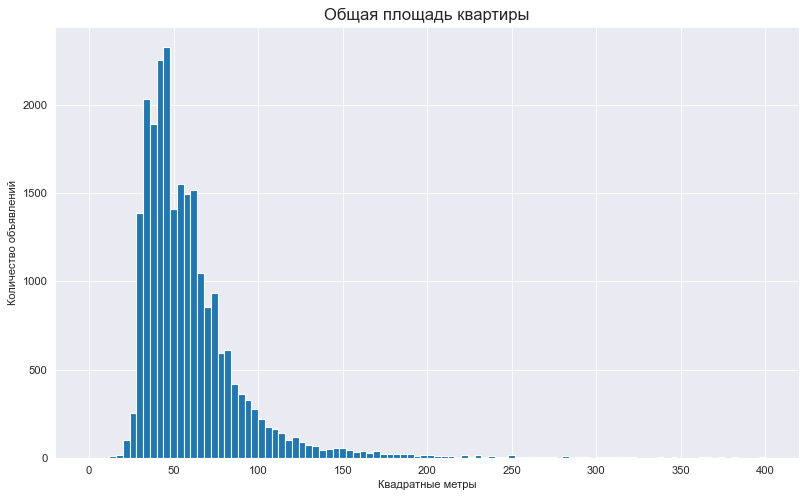

count    23560.000000
mean        60.259798
std         35.098628
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        631.200000
Name: total_area, dtype: float64

In [41]:
plt.figure(figsize=(12, 7), dpi=80)
df['total_area'].hist(bins=100, range=(0, 400))
plt.title('Общая площадь квартиры', fontsize=15)
plt.xlabel('Квадратные метры')
plt.ylabel('Количество объявлений')
plt.show()
df['total_area'].describe()

В данных представлена информация об объектах общей площадью от 12 до 900 м². Большинство объектов общей площадью от 40 до 69.7 м².

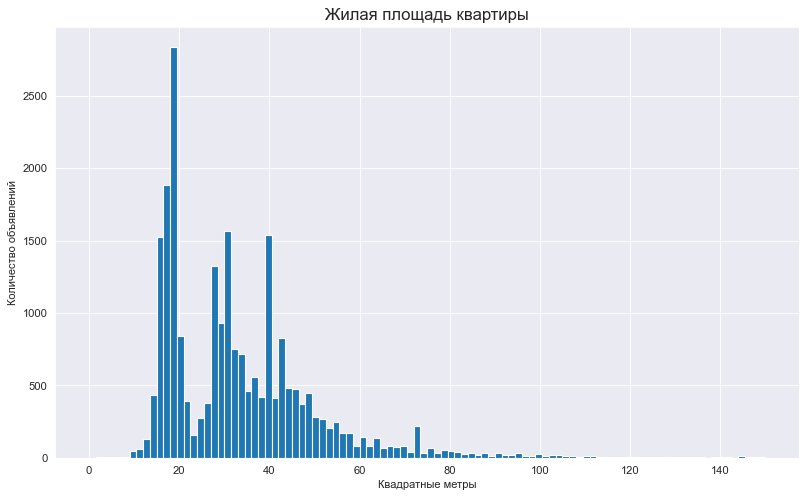

count    23560.000000
mean        34.406113
std         21.825269
min          2.000000
25%         18.400000
50%         30.000000
75%         41.900000
max        409.000000
Name: living_area, dtype: float64

In [42]:
plt.figure(figsize=(12, 7), dpi=80)
df['living_area'].hist(bins=100, range=(0, 150))
plt.title('Жилая площадь квартиры', fontsize=15)
plt.xlabel('Квадратные метры')
plt.ylabel('Количество объявлений')
plt.show()
df['living_area'].describe()

В датафрейме представлена информация об объектах с жилой площадью квартиры от 2 до 409 м². Основная часть объектов с жилой площадью от 18.4 до 41.9 м². Данные неоднородны, есть выброс около 19 м², "яма" на 22 м², также выбросы поменьше на 30 и 40 м².

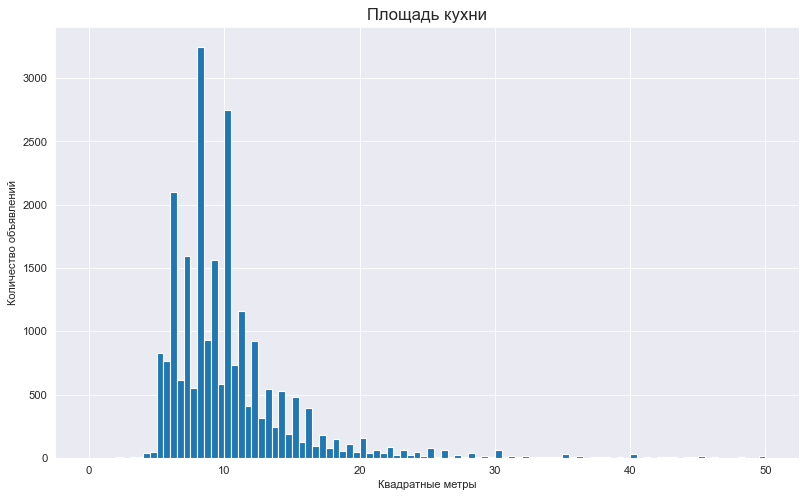

count    23560.000000
mean        10.451014
std          5.646532
min          1.300000
25%          7.300000
50%          9.000000
75%         11.600000
max        107.000000
Name: kitchen_area, dtype: float64

In [43]:
plt.figure(figsize=(12, 7), dpi=80)
df['kitchen_area'].hist(bins=100, range=(0, 50))
plt.title('Площадь кухни', fontsize=15)
plt.xlabel('Квадратные метры')
plt.ylabel('Количество объявлений')
plt.show()
df['kitchen_area'].describe()

Площадь кухни от 1,3 до 107 м². Основной разброс значений от 7.3 до 11.6 м².

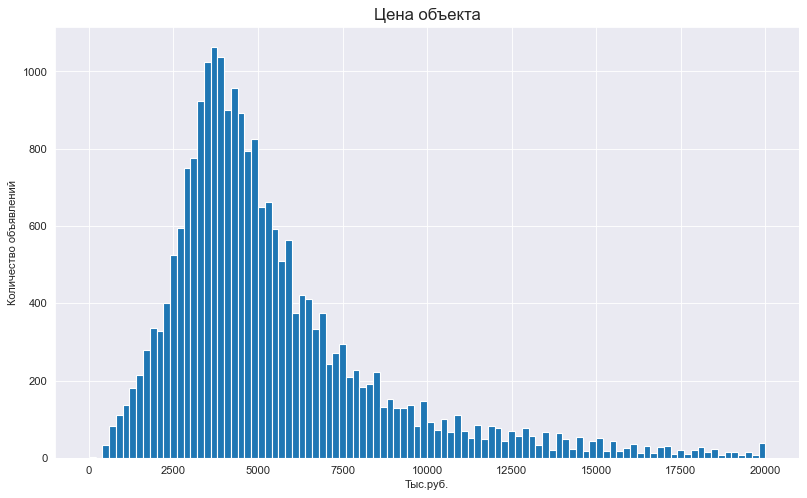

count     23560.000000
mean       6473.855475
std        8994.913759
min          12.000000
25%        3400.000000
50%        4646.000000
75%        6790.000000
max      330000.000000
Name: last_price, dtype: float64

In [44]:
plt.figure(figsize=(12, 7), dpi=80)
df['last_price'].hist(bins=100, range=(0, 20000))
plt.title('Цена объекта', fontsize=15)
plt.xlabel('Тыс.руб.')
plt.ylabel('Количество объявлений')
plt.show()
df['last_price'].describe()

Цена объектов от 12 до 330000 тыс.руб. Основной разброс значений от 3400 до 6790 тыс. руб.

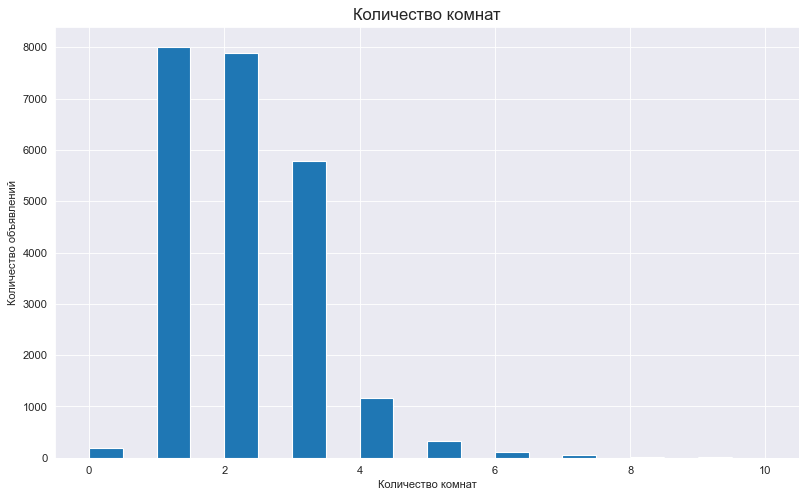

count    23560.000000
mean         2.069949
std          1.076092
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [45]:
plt.figure(figsize=(12, 7), dpi=80)
df['rooms'].hist(bins=20, range=(0, 10))
plt.title('Количество комнат', fontsize=15)
plt.xlabel('Количество комнат')
plt.ylabel('Количество объявлений')
plt.show()
df['rooms'].describe()

Количество комнат в представленных объектах - от 0 (студии и квартиры со свободной планировкой) до 19. Большинство представленных объектов - 1-3-комнатные квартиры.

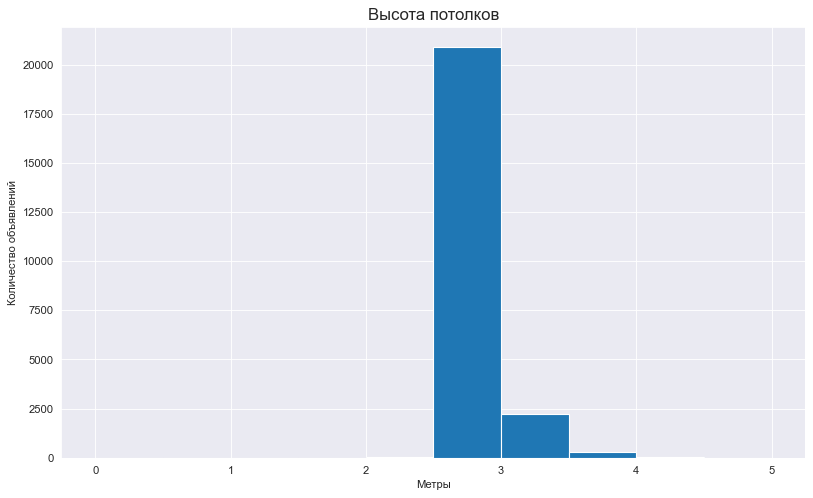

count    23560.000000
mean         2.698435
std          0.236565
min          2.200000
25%          2.600000
50%          2.650000
75%          2.700000
max         10.000000
Name: ceiling_height, dtype: float64

In [46]:
plt.figure(figsize=(12, 7), dpi=80)
df['ceiling_height'].hist(bins=10, range=(0, 5))
plt.title('Высота потолков', fontsize=15)
plt.xlabel('Метры')
plt.ylabel('Количество объявлений')
plt.show()
df['ceiling_height'].describe()

Среди данных представлены объекты с высотой потолков от 2.2 до 10 м. В большинстве объектов высота потолков от 2,6 до 2,7 метров.

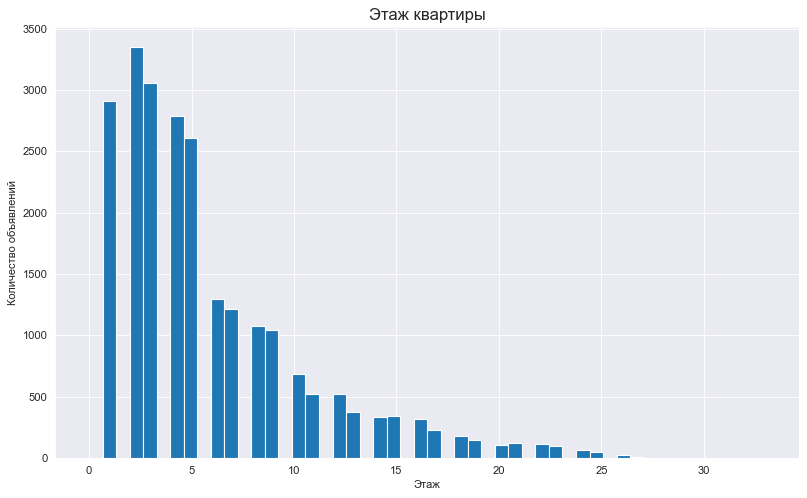

count    23560.000000
mean         5.876570
std          4.869637
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

In [47]:
plt.figure(figsize=(12, 7), dpi=80)
df['floor'].hist(bins=50, range=(0, 33))
plt.title('Этаж квартиры', fontsize=15)
plt.xlabel('Этаж')
plt.ylabel('Количество объявлений')
plt.show()
df['floor'].describe()

В данных представлена информация об объектах, расположенных от 1 до 33 этажа. Основная часть объектов располагается от 1 до 8 этажа. Больше всего объектов расположены на 2 этаже (около 3300), чуть меньше на 3 этаже (3000), еще меньше на 1, 4 и 5 этажах (в среднем по 2770 объектов).

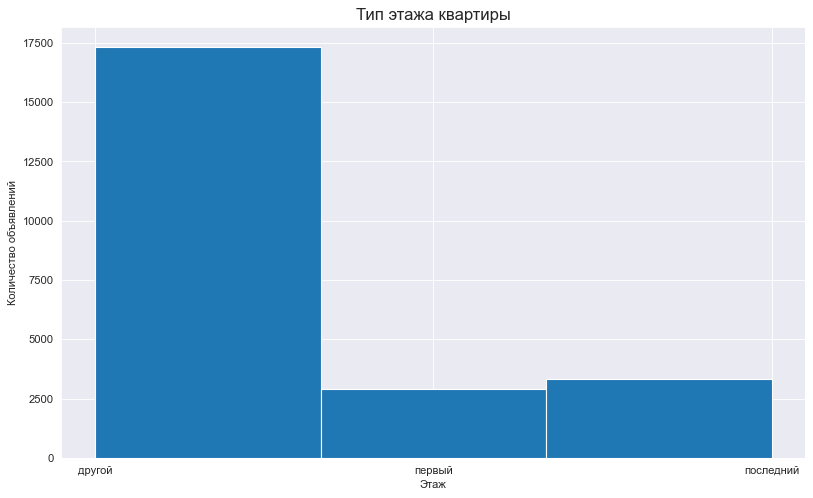

In [48]:
plt.figure(figsize=(12, 7), dpi=80)
df['floors_category'].hist(bins=3)
plt.title('Тип этажа квартиры', fontsize=15)
plt.xlabel('Этаж')
plt.ylabel('Количество объявлений')
plt.show()

Абсолютное большинство объектов расположены не на первом и не на последнем этажах (около 17500). Меньше всего объектов расположены на 1 этаже, чуть больше - на последнем.

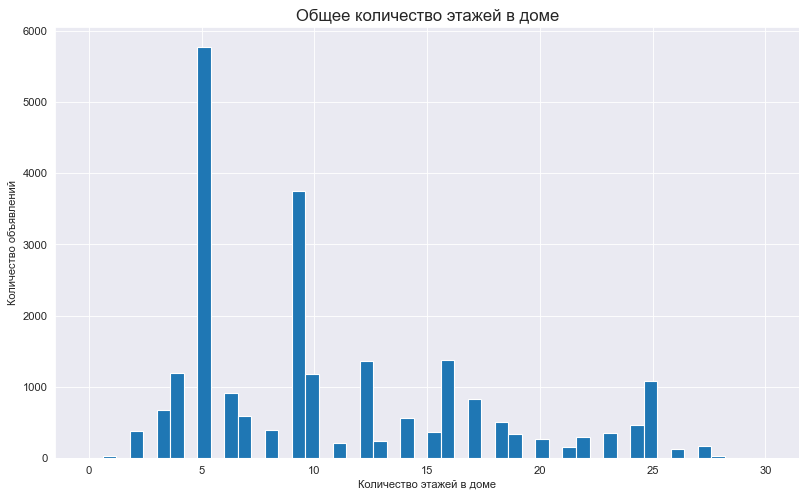

count    23560.000000
mean        10.671520
std          6.581513
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         37.000000
Name: floors_total, dtype: float64

In [49]:
plt.figure(figsize=(12, 7), dpi=80)
df['floors_total'].hist(bins=50, range=(0, 30))
plt.title('Общее количество этажей в доме', fontsize=15)
plt.xlabel('Количество этажей в доме')
plt.ylabel('Количество объявлений')
plt.show()
df['floors_total'].describe()

Среди исследуемых данных большее количество объектов находится в пятиэтажных домах, на втором месте - девятиэтажки. В целом, данные очень неоднородные, большинство объектов располагаются в зданиях с общим количеством этажей от 5 до 16.

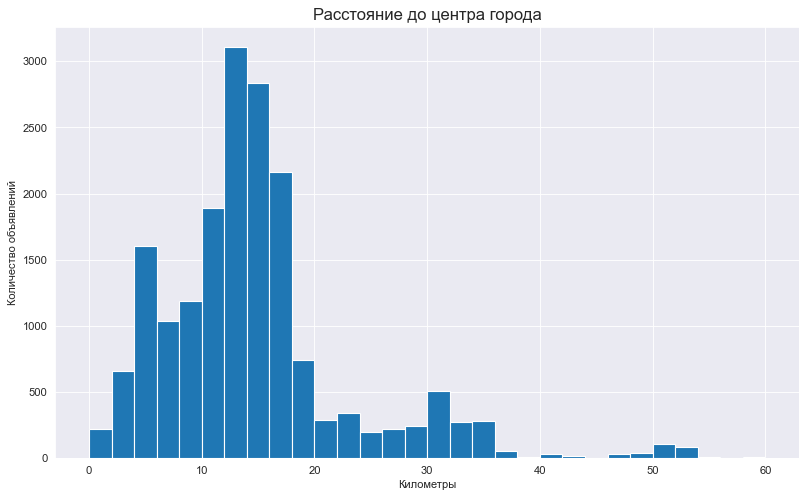

count    18128.000000
mean        14.188052
std          8.614648
min          0.000000
25%          9.000000
50%         13.000000
75%         16.000000
max         66.000000
Name: centers_nearest, dtype: float64

In [50]:
plt.figure(figsize=(12, 7), dpi=80)
df['centers_nearest'].hist(bins=30, range=(0, 60))
plt.title('Расстояние до центра города', fontsize=15)
plt.xlabel('Километры')
plt.ylabel('Количество объявлений')
plt.show()
df['centers_nearest'].describe()

В среднем расстояние до центра города - 14 км. Большинство объектов расположены от 9 до 16 км до центра города, тем не менее есть как объекты, располагающиеся непосредственно в центре (0 км), так и объекты, с удаленностью 66 км от центра города.

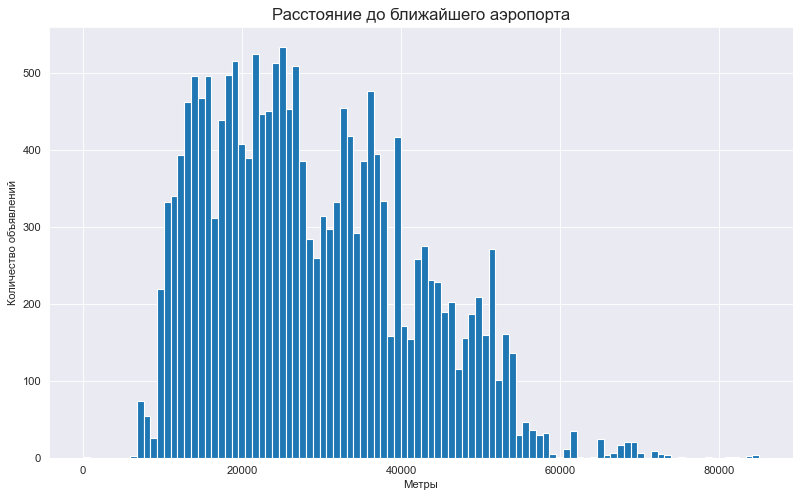

count    18128.000000
mean     28787.305246
std      12604.383214
min          0.000000
25%      18590.000000
50%      26763.000000
75%      37227.000000
max      84869.000000
Name: airports_nearest, dtype: float64

In [51]:
plt.figure(figsize=(12, 7), dpi=80)
df['airports_nearest'].hist(bins=100, range=(0, 85000))
plt.title('Расстояние до ближайшего аэропорта', fontsize=15)
plt.xlabel('Метры')
plt.ylabel('Количество объявлений')
plt.show()
df['airports_nearest'].describe()

Большинство значений расположены от 18,6 до 37 км от аэропорта. В среднем - 28 км до аэропорта (медиана - 26 км).

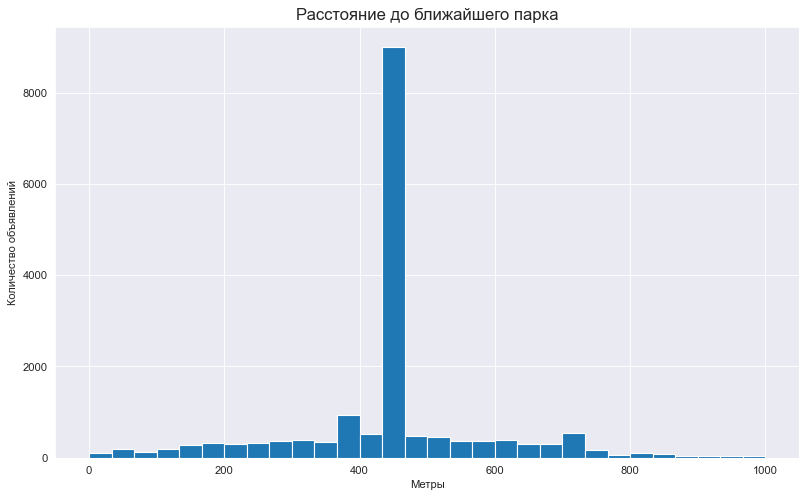

count    17574.000000
mean       475.878713
std        234.999949
min          1.000000
25%        433.000000
50%        460.000000
75%        460.000000
max       3190.000000
Name: parks_nearest, dtype: float64

In [52]:
plt.figure(figsize=(12, 7), dpi=80)
df['parks_nearest'].hist(bins=30, range=(0, 1000))
plt.title('Расстояние до ближайшего парка', fontsize=15)
plt.xlabel('Метры')
plt.ylabel('Количество объявлений')
plt.show()
df['parks_nearest'].describe()

Исследуемые объекты расположены на расстоянии от 1 до 3190 м до ближайшего парка. Основная часть объектов расположена от 433 до 460 м до парка.

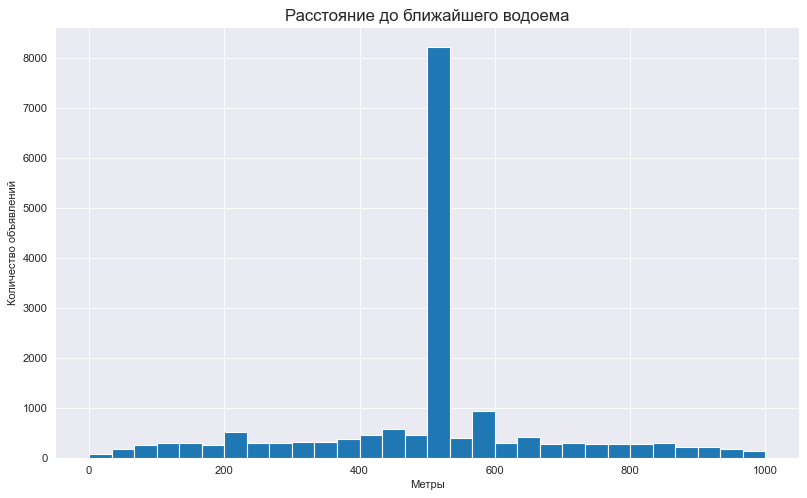

count    18043.000000
mean       510.615779
std        199.882224
min         13.000000
25%        466.000000
50%        504.000000
75%        562.500000
max       1344.000000
Name: ponds_nearest, dtype: float64

In [53]:
plt.figure(figsize=(12, 7), dpi=80)
df['ponds_nearest'].hist(bins=30, range=(0, 1000))
plt.title('Расстояние до ближайшего водоема', fontsize=15)
plt.xlabel('Метры')
plt.ylabel('Количество объявлений')
plt.show()
df['ponds_nearest'].describe()

Исследуемые объекты расположены на расстоянии от 13 до 1344 м до ближайшего водоема. Основная часть объектов расположена от 466 до 562,5 м до водоема.

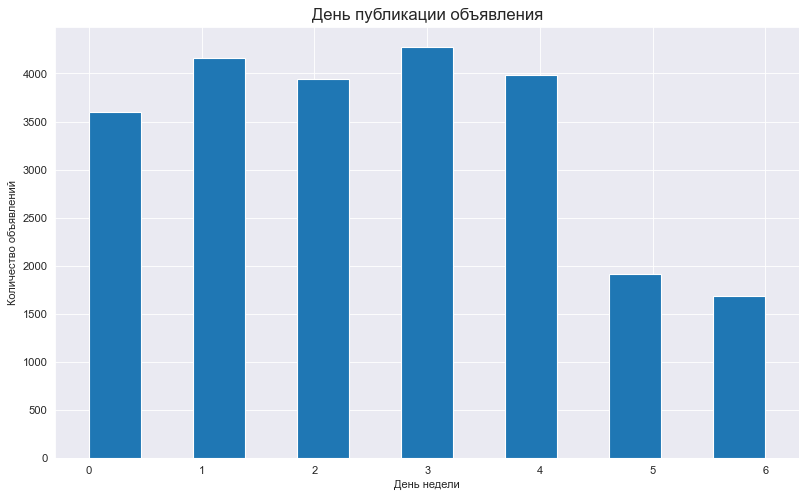

3    4275
1    4163
4    3980
2    3947
0    3595
5    1917
6    1683
Name: day_week, dtype: int64

In [54]:
plt.figure(figsize=(12, 7), dpi=80)
df['day_week'].hist(bins=13, range=(0, 6))
plt.title('День публикации объявления', fontsize=15)
plt.xlabel('День недели')
plt.ylabel('Количество объявлений')
plt.show()
df['day_week'].value_counts()

В будние дни публикуется примерно одинаковое количество объявлений - от 3595 в понедельник (наименьшее значение) до 4275 в четверг (наибольшее значение). В выходные объявлений заметно меньше - в среднем около 1800.

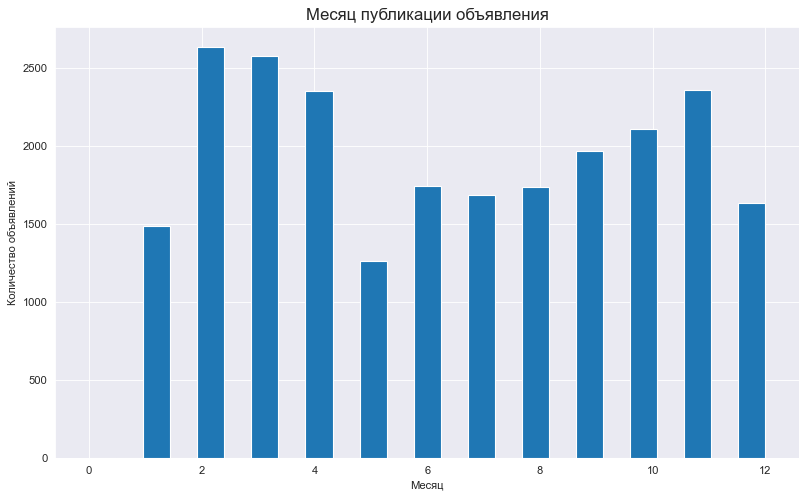

2     2635
3     2575
11    2360
4     2356
10    2108
9     1970
6     1746
8     1739
7     1686
12    1637
1     1487
5     1261
Name: month, dtype: int64

In [55]:
plt.figure(figsize=(12, 7), dpi=80)
df['month'].hist(bins=25, range=(0, 12))
plt.title('Месяц публикации объявления', fontsize=15)
plt.xlabel('Месяц')
plt.ylabel('Количество объявлений')
plt.show()
df['month'].value_counts()

Больше всего объявлений публикуют в феврале, марте, апреле и ноябре. Меньше всего - с мая по август и с декабря по январь.

### Изучение скорости продажи квартиры

Рассмотрим, насколько быстрыми были продажи квартир.

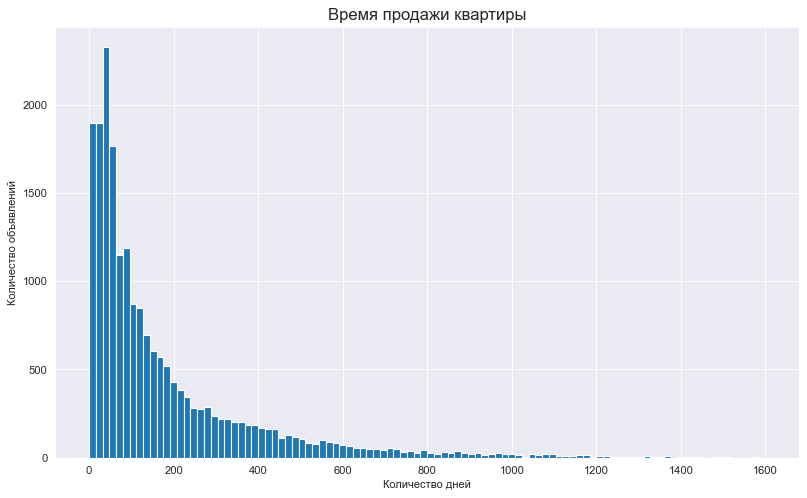

In [56]:
plt.figure(figsize=(12, 7), dpi=80)
df['days_exposition'].hist(bins=100, range=(0, 1600))
plt.title('Время продажи квартиры', fontsize=15)
plt.xlabel('Количество дней')
plt.ylabel('Количество объявлений')
plt.show()

Видим заметный пик на значении около 50 дней. Построим диаграмму размаха.

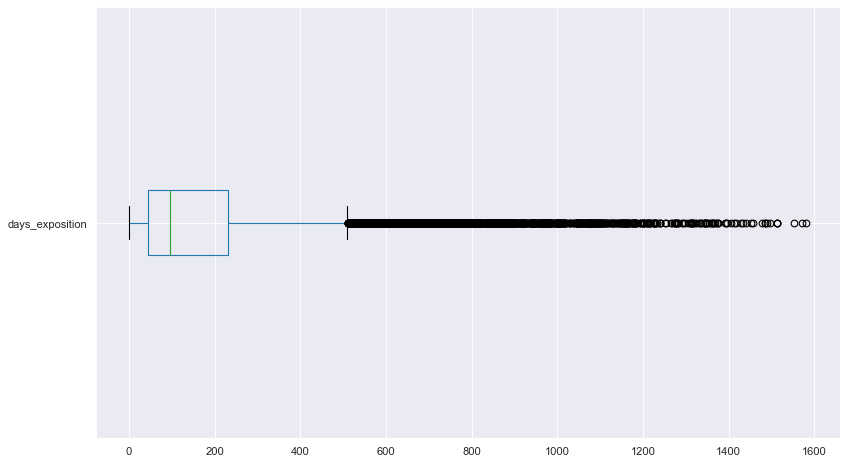

In [57]:
plt.figure(figsize=(12, 7), dpi=80)
df.boxplot(['days_exposition'], vert = False)
plt.show()

Избавимся от выбросов. 

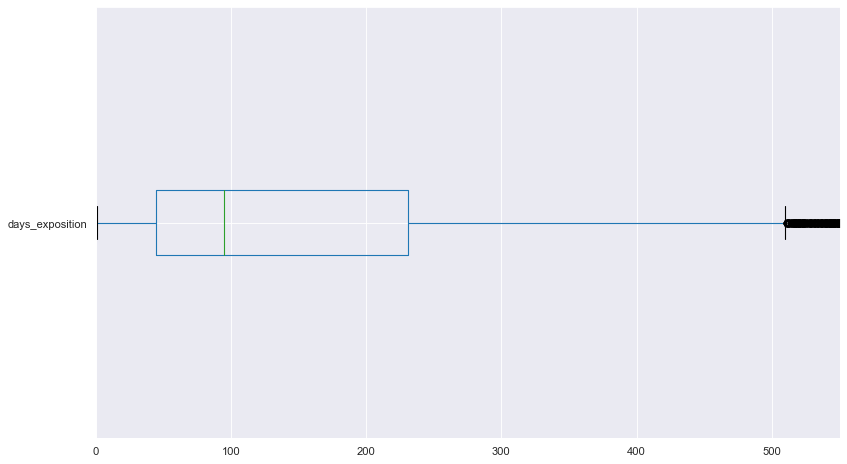

count    20389.000000
mean       180.749277
std        219.749557
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [58]:
plt.figure(figsize=(12, 7), dpi=80)
df.boxplot(['days_exposition'], vert = False)
plt.xlim(0, 550)
plt.show()
df['days_exposition'].describe()

#### Вывод

Минимальное время продажи квартиры: 1 день.
Максимальное время продажи квартиры: 1580 дней.
Медианное значение времени продажи квартиры: 95 дней.
Среднее время продажи квартиры: 181 день.

В среднем продажа квартиры занимает от 45 до 231 дня. Продажи квартир менее чем за 45 дней - очень быстрые. Если объект не продается более 231 дня - стоит начать беспокоиться.

Максимальное время продажи квартиры - 1580 дней (более 4 лет) - это очень долгий срок.

### Анализ зависимости цены от различных факторов

Рассмотрим, как влияют на общую (полную) стоимость объекта следующие факторы:
- общая площадь;
- жилая площадь;
- площадь кухни;
- количество комнат;
- этаж, на котором расположена квартира (первый, последний, другой);
- дата размещения (день недели, месяц, год).

Создадим новую таблицу с исследуемыми факторами.

In [59]:
analyzed_data = df[
    ['last_price', 'total_area', 'living_area', 
     'kitchen_area', 'rooms', 'floors_category', 
     'day_week', 'month', 'year']
]
analyzed_data.head()

,last_price,total_area,living_area,kitchen_area,rooms,floors_category,day_week,month,year
0,13000,108.0,51.0,25.0,3,другой,3,3,2019
1,3350,40.4,18.6,11.0,1,первый,1,12,2018
2,5196,56.0,34.3,8.3,2,другой,3,8,2015
3,64900,159.0,72.3,16.0,3,другой,4,7,2015
4,10000,100.0,32.0,41.0,2,другой,1,6,2018


Построим матрицу корреляции, тепловую карту и матрицу диаграмм рассеяния.

In [60]:
analyzed_data.corr()

,last_price,total_area,living_area,kitchen_area,rooms,day_week,month,year
last_price,1.000000,0.706304,0.620168,0.529152,0.402227,-0.005139,-0.000121,-0.047551
total_area,0.706304,1.000000,0.931967,0.605747,0.760360,-0.006600,0.003643,-0.079231
living_area,0.620168,0.931967,1.000000,0.443498,0.834621,-0.006947,-0.000350,-0.072735
kitchen_area,0.529152,0.605747,0.443498,1.000000,0.283500,-0.008739,0.002966,-0.057362
rooms,0.402227,0.760360,0.834621,0.283500,1.000000,-0.005578,-0.004521,-0.054237
day_week,-0.005139,-0.006600,-0.006947,-0.008739,-0.005578,1.000000,0.012119,-0.002863
month,-0.000121,0.003643,-0.000350,0.002966,-0.004521,0.012119,1.000000,-0.271665
year,-0.047551,-0.079231,-0.072735,-0.057362,-0.054237,-0.002863,-0.271665,1.000000


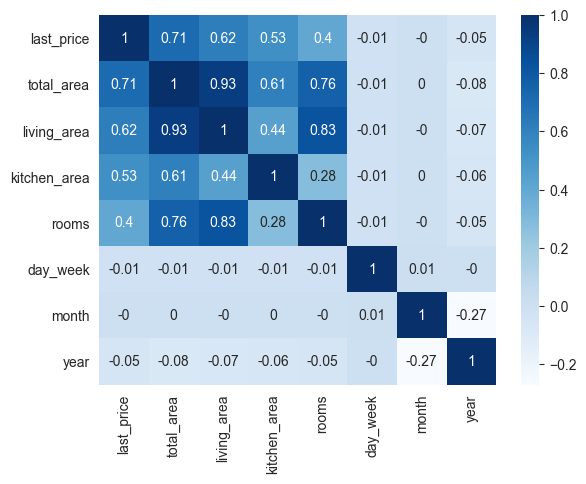

In [61]:
sns.heatmap(analyzed_data.corr().round(2), cmap="Blues", annot=True);

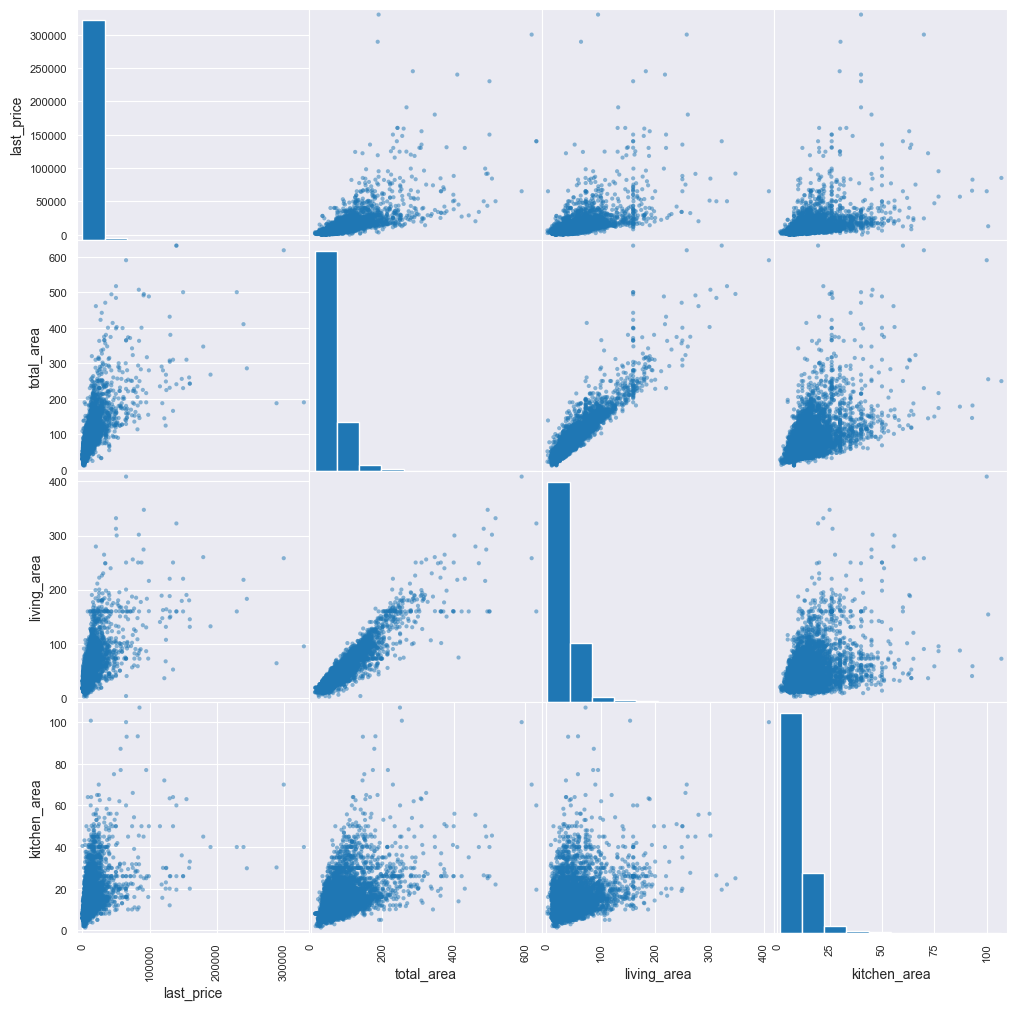

In [62]:
pd.plotting.scatter_matrix(analyzed_data[
    ['last_price', 'total_area', 'living_area', 'kitchen_area']
], figsize=(12, 12))
plt.show()

Из полученных данных ни один фактор единолично не оказывает прямого сильного влияния на стоимость объекта. Все факторы нужно учитывать в совокупности. Тем не менее, рассмотрим факторы по степени влияния:
- Самая сильная корреляция между стоимостью объекта и общей площадью. Коэффициент корреляции составляет 0.71. Чем больше площадь объекта, тем выше цена;
- Чуть ниже коэффициент вариации (0.62) у признака "жилая площадь". Зависимость прямая - чем больше жилая площадь, тем выше цена объекта;
- Коэффициент вариации показателя "площадь кухни" составляет 0.53. Зависимость прямая - чем больше площадь кухни, тем выше цена объекта.

Так как количество комнат, этаж, на котором расположена квартира и дата размещения (день недели, месяц, год) являются категориальными переменными, построим для них отдельные графики.

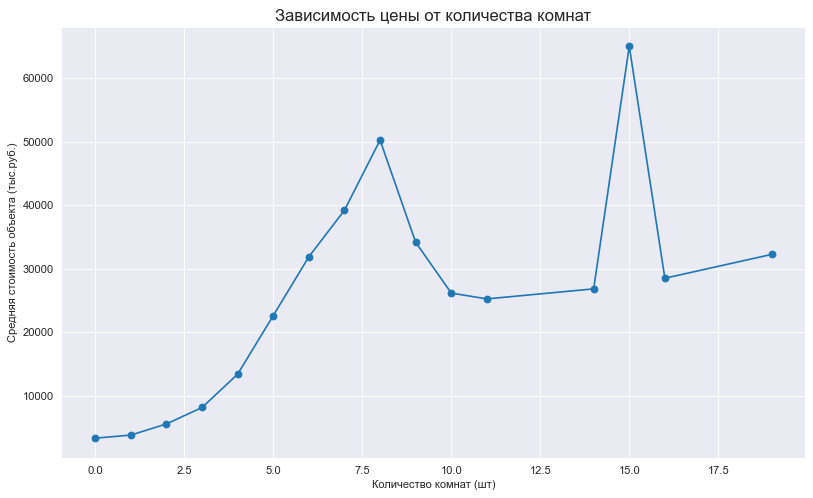

In [63]:
plt.figure(figsize=(12, 7), dpi=80)
df.groupby('rooms')['last_price'].mean().plot(style='o-')
plt.title('Зависимость цены от количества комнат', fontsize=15)
plt.xlabel('Количество комнат (шт)')
plt.ylabel('Средняя стоимость объекта (тыс.руб.)')
plt.show()

Цена объектов, в которых расположено от 1 до 8 комнат постепенно растет. Далее цена вдруг начинает падать, а затем снова резко "взлетает" в объектах с 15 комнатами. Вероятнее всего, это какое-то элитное жилье, данных о котором совсем мало в датафрейме.

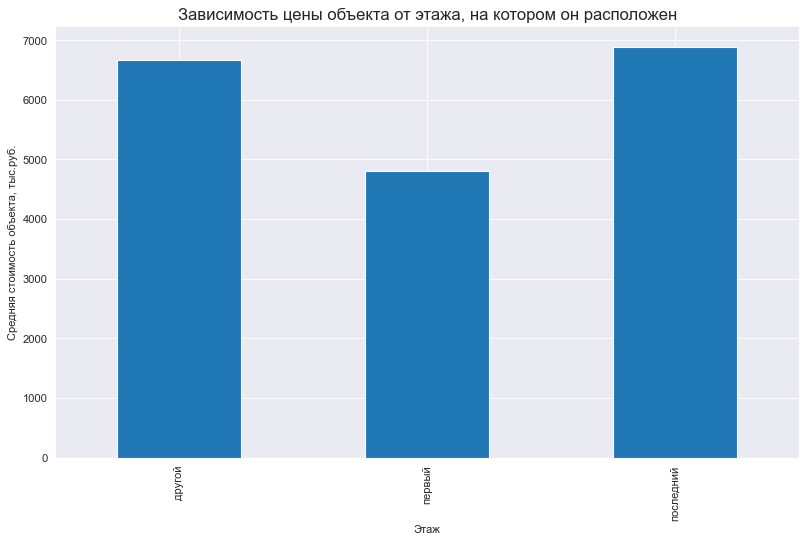

In [64]:
plt.figure(figsize=(12, 7), dpi=80)
df.groupby('floors_category')['last_price'].mean().plot(kind='bar')
plt.title('Зависимость цены объекта от этажа, на котором он расположен', fontsize=15)
plt.xlabel('Этаж')
plt.ylabel('Средняя стоимость объекта, тыс.руб.')
plt.show()

In [65]:
df.groupby('floors_category')['last_price'].mean().round(0)

floors_category
другой       6675.0
первый       4803.0
последний    6890.0
Name: last_price, dtype: float64

Судя по полученным данным, самая высокая стоимость у объектов, расположенных на последнем этаже - в среднем 6890 тыс.руб, самые дешевые объекты расположены на 1 этаже - 4803 тыс.руб.

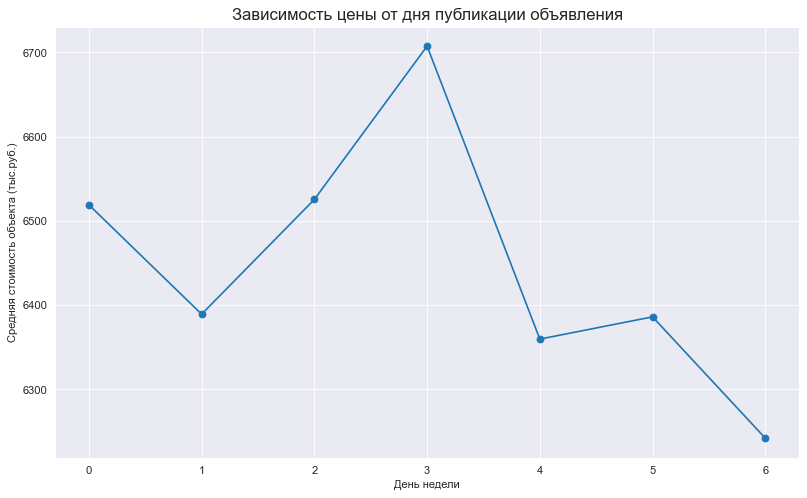

In [66]:
plt.figure(figsize=(12, 7), dpi=80)
df.groupby('day_week')['last_price'].mean().plot(style='o-')
plt.title('Зависимость цены от дня публикации объявления', fontsize=15)
plt.xlabel('День недели')
plt.ylabel('Средняя стоимость объекта (тыс.руб.)')
plt.show()

Самая высокая стоимость у объектов, опубликованных в четверг, самая низкая - у объектов, опубликованных c пятницы по воскресенье, а также во вторник.

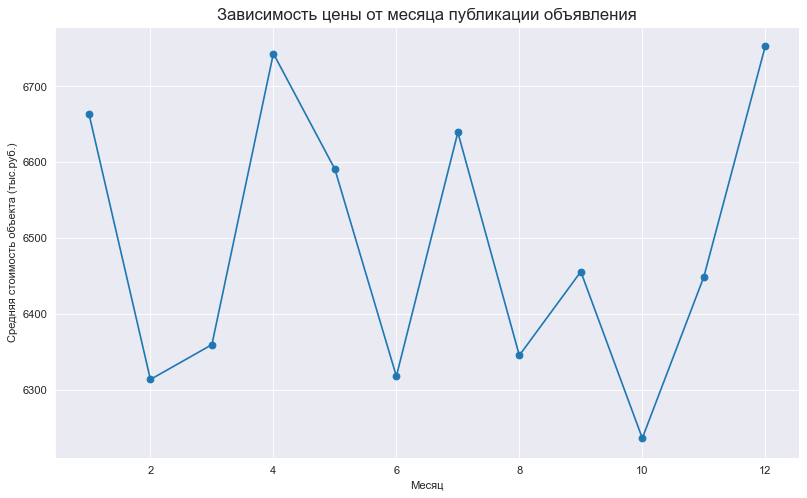

In [67]:
plt.figure(figsize=(12, 7), dpi=80)
df.groupby('month')['last_price'].mean().plot(style='o-')
plt.title('Зависимость цены от месяца публикации объявления', fontsize=15)
plt.xlabel('Месяц')
plt.ylabel('Средняя стоимость объекта (тыс.руб.)')
plt.show()

Самая высокая стоимость у объектов, опубликованных в апреле, декабре и январе, самая низкая - у объектов, опубликованных в феврале, марте, июле, августе и октябре.

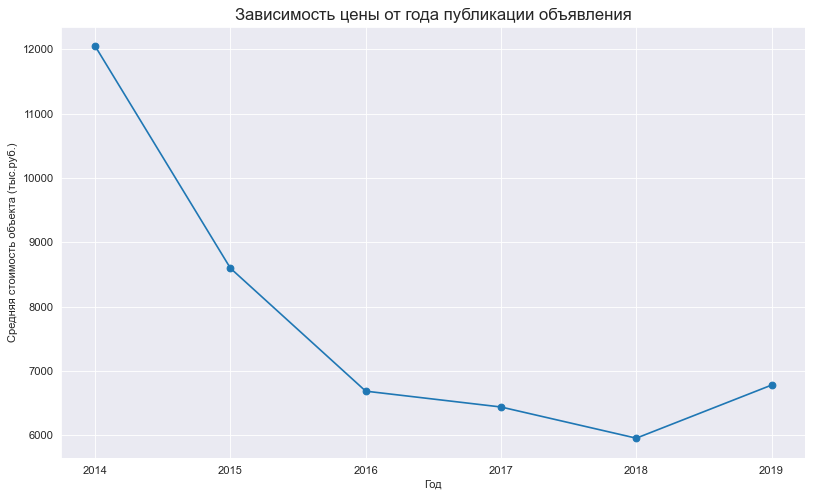

In [68]:
plt.figure(figsize=(12, 7), dpi=80)
df.groupby('year')['last_price'].mean().plot(grid=True, style='o-', legend=False)
plt.title('Зависимость цены от года публикации объявления', fontsize=15)
plt.xlabel('Год')
plt.ylabel('Средняя стоимость объекта (тыс.руб.)')
plt.show()

Наиболее дорогие объекты были проданы в 2014 году. Самые дешевые объекты - в 2018 году.

### Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

Найдем населённые пункты с самой высокой и низкой стоимостью квадратного метра. Для этого создадим сводную таблицу.

In [69]:
top10_locality = df.pivot_table(index='locality_name', values='price_per_meter', aggfunc=['mean', 'count'])
top10_locality.columns = ['mean', 'count']
top10_locality = top10_locality.sort_values(by='count', ascending=False).head(10)
top10_locality

,mean,count
locality_name,,
Санкт-Петербург,114.675939,15647
Мурино,86.040648,586
Кудрово,95.260426,470
поселок Шушары,78.551526,439
Всеволожск,68.653819,398
Пушкин,103.125691,369
Колпино,75.424290,338
поселок Парголово,90.176116,327
Гатчина,68.746287,307


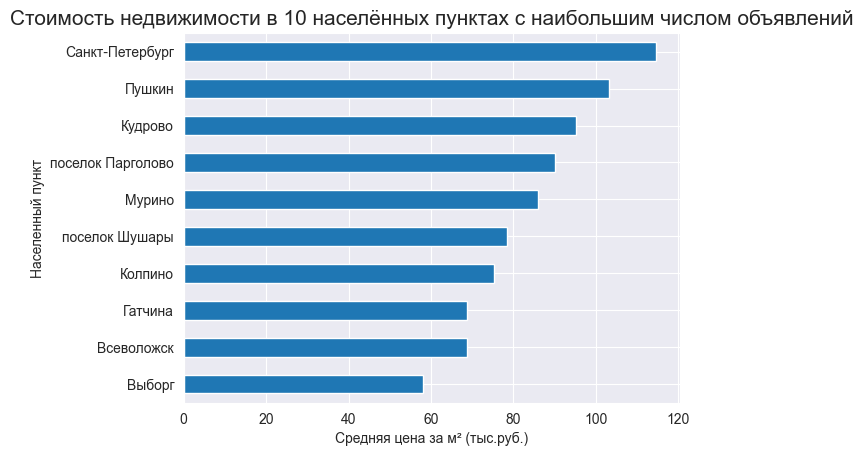

In [70]:
top10_locality.sort_values(by='mean').plot(y='mean', kind='barh', legend=False)
plt.title('Стоимость недвижимости в 10 населённых пунктах с наибольшим числом объявлений', fontsize=15)
plt.xlabel('Средняя цена за м² (тыс.руб.)')
plt.ylabel('Населенный пункт')
plt.show()

Среди населенных пунктов с наибольшим числом объявлений самым дорогим является город Санкт-Петербург. В среднем цена за 1 м² недвижимости там составляет 114 тыс.руб.
Самая низкая цена в городе Выборг - 58 тыс.руб. за 1 м².

### Средняя цена каждого километра в Санкт-Петербурге

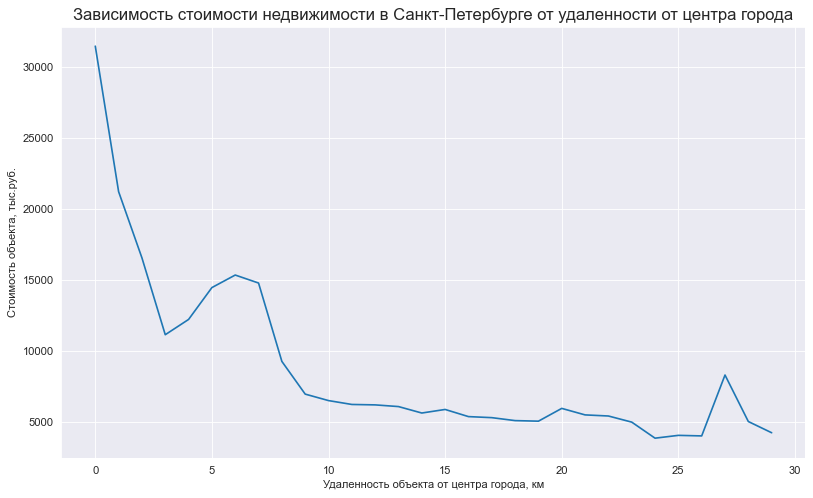

In [71]:
plt.figure(figsize=(12, 7), dpi=80)
df.query('locality_name == "Санкт-Петербург"').groupby('centers_nearest')['last_price'].mean().plot()
plt.title('Зависимость стоимости недвижимости в Санкт-Петербурге от удаленности от центра города', fontsize=15)
plt.xlabel('Удаленность объекта от центра города, км')
plt.ylabel('Стоимость объекта, тыс.руб.')
plt.show()

In [72]:
print('Средняя цена каждого километра:', (
    df.query('locality_name == "Санкт-Петербург"')['last_price'].mean() / 
    df.query('locality_name == "Санкт-Петербург"')['centers_nearest'].mean()
).round(2), 'тыс.руб.')

Средняя цена каждого километра: 687.49 тыс.руб.


По графику видна зависимость снижения стоимости объекта в зависимости от удаленности от центра. Чем дальше от центра, тем дешевле квартиры.

## Общий вывод

**Во время предобработки данных были изучены, заменены аномальные и удалены пропущенные значения:**

- Были заполнены пропуски в столбце `ceiling_height` на медианные значения, а также заменены аномальные значения;
- Пропуски в столбцах `living_area`, `kitchen_area` заполнены в зависимости от категории размера квартиры;
- Из-за пропущенных данных в столбцах `floors_total` и `locality_name` удалены 135 строк;
- Удалены строки с аномальными значениями в столбцах `last_price` и `floors_total`;
- Заполнен столбец `is_apartment`;
- Заменены аномальные значения в столбце `rooms`;
- Заполнены пропуски в столбце `balcony`; 
- В столбцах `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest` удалось заменить лишь часть пропусков, так как у нас не хватает данных; 
- Пропуски в столбце `days_exposition` также не были заполнены и оставлены в первоначальном виде.
- К датафрейму были добавлены 6 столбцов, необходимых для дальнейшего анализа.


**В результате исседования были получены следующие выводы:**

В среднем продажа квартиры занимает от 45 до 231 дня. Продажи квартир менее чем за 45 дней - очень быстрые. Если объект не продается более 231 дня - стоит начать беспокоиться и, возможно, пересмотреть стоимость объекта.

Влияние различных факторов на стоимость объекта:
- Самая сильная корреляция между стоимостью объекта и общей площадью. Зависимость прямая - чем больше площадь объекта, тем выше цена;
- Чем больше жилая площадь объекта, тем выше цена;
- Чем больше площадь кухни, тем выше цена объекта;
- Чем больше комнат в квартире, тем выше цена объекта;
- Самыми дешевыми являются квартиры, расположенные на первом этаже. Самыми дорогими - расположенные на последнем этаже;
- Объявления с самыми дорогими квартирами размещают по четвергам. С самыми дешевыми - в воскресенье, вторник, пятницу и субботу.
- Объявления с самыми дешевыми квартирами размещают в октябре, феврале, марте, июле и августе. С самыми дорогими - в апреле, декабре и январе;
- Самые дорогие объекты были проданы в 2014 году. Самые дешевые - в 2018 году. В 2019 году цена начала возрастать.


**Были определены 10 населенных пунктов с наибольшим числом объявлений:**

- Санкт-Петербург - 15647
- Мурино - 586
- Кудрово - 470
- поселок Шушары - 439
- Всеволожск - 398
- Пушкин - 369
- Колпино - 338
- поселок Парголово - 327
- Гатчина - 307
- Выборг - 237 


- Самая высокая цена 1 м² составляет 114 тыс.руб. (город Санкт-Петербург)
- Самая низкая цена 1 м² составляет 58 тыс.руб. (город Выборг)


При анализе зависимости стоимости недвижимости в Санкт-Петербурге от удаленности от центра города была выявлена обратная корреляция: чем дальше от центра города, тем ниже стоимость квартиры.


В завершении хочется отметить что ни один из фактор сам по себе не оказывает сильного влияния на стоимость объекта. Все факторы нужно учитывать в совокупности. Тем не менее, изучение каждого конкретного фактора позволяет отслеживать аномалии и мошенническую деятельность.